# Session #1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [28]:
# You can run linux commands in colab using "!"

# Examples:
# Present working directory
! pwd
# Contents of present working directory
! ls -l

/content
total 88
-rw-r--r-- 1 root root 83556 Jan 27 18:47 gapminder-FiveYearData.csv
drwxr-xr-x 1 root root  4096 Jan 25 14:23 sample_data


In [22]:
# Upload the csv file to colab before tring to load it in pandas.
path = "gapminder-FiveYearData.csv"
df = pd.read_csv(path, header=0)

In [23]:
df.shape

(1704, 6)

In [4]:
df.head(20)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


# Check whether all countries have data for the same years
- Check for null values.
- Check for duplicates.

In [5]:
print("#null-values:", df['year'].isna().sum())

#null-values: 0


In [6]:
print("#duplicates:", df.duplicated(["country", "year"]).sum())

#duplicates: 0


In [7]:
# ! Incorrect check

total_num_unique = df["year"].nunique()
afg_num_unique = df[df["country"] == "Afghanistan"]["year"].nunique()

print(total_num_unique == afg_num_unique)

"""
Above code will fail on data resembling the following:
a = [1,2,3,4]
b = [2,3,4]

unique = [1,2,3,4]
"""

True


'\nAbove code will fail on data resembling the following:\na = [1,2,3,4]\nb = [2,3,4]\n\nunique = [1,2,3,4]\n'

In [8]:
# ! Incorrect check

total_num_unique = df["year"].nunique()

# iterate over all the years
for country in df["country"]:
    # compare number of unique elements
    country_num_unique = df[df["country"] == country]["year"].nunique()
    if total_num_unique != country_num_unique:
        print("Mismatch")
        break

"""
Above code will fail on data resembling the following:
a = [1,2,3]
b = [2,2,3,4]
"""

'\nAbove code will fail on data resembling the following:\na = [1,2,3]\nb = [2,2,3,4]\n'

In [9]:
# ! Incorrect check

total_unique = df["year"].unique().tolist()

# iterate over all the years
for country in df["country"]:
    # compare unique elements
    country_unique = df[df["country"] == country]["year"].unique().tolist()
    if total_unique != country_unique:
        print("Mismatch")
        break

"""
Above code will fail on data resembling the following:
a = [1,2,3]
b = [2,2,3,4] # ! Duplicates
"""

'\nAbove code will fail on data resembling the following:\na = [1,2,3]\nb = [2,2,3,4] # ! Duplicates\n'

In [10]:
# * Correct check

total_unique = df["year"].unique().tolist()

# iterate over all the years
for country in df["country"]:
    # compare total unique elements against the all of the country's elements
    country = df[df["country"] == country]["year"].tolist()
    if total_unique != country:
        print("Mismatch")
        break

In [11]:
# Check whether the test fails when it should.

df_temp = df.drop(index=1)
total_unique = df_temp["year"].unique().tolist()

# iterate over all the years
for country in df_temp["country"]:
    # check for unique elements
    country_unique = df_temp[df_temp["country"] == country]["year"].tolist()
    if total_unique != country_unique:
        print("Mismatch")
        break

Mismatch


# Continent representation
One bar per continent
1. Each bar shows the frequency.
2. Each bar shows the percentage.


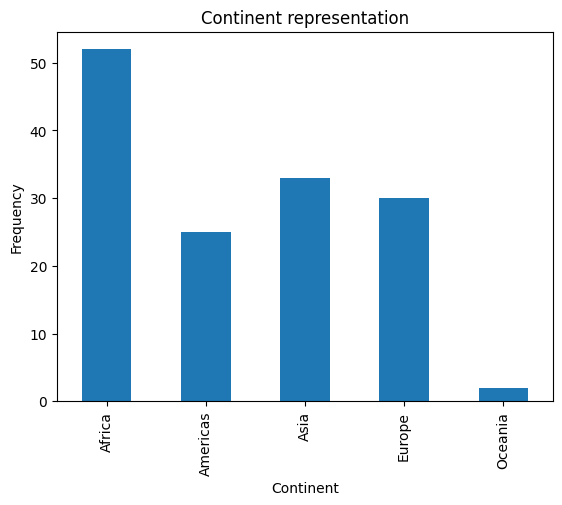

In [12]:
df.groupby("continent")["country"].nunique().plot(
    kind="bar",
    title="Continent representation",
    xlabel="Continent",
    ylabel="Frequency",
)
plt.show()

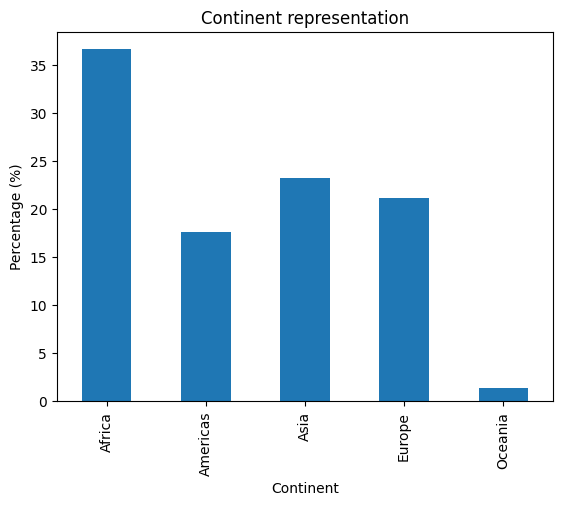

In [13]:
total_countries = df["country"].nunique()
df_grouped = df.groupby("continent")["country"].nunique()

df_per = 100 * df_grouped / total_countries

df_per.plot(
    kind="bar",
    title="Continent representation",
    xlabel="Continent",
    ylabel="Percentage (%)",
)
plt.show()

# How has the population/life-expectancy/gdp of a country changed over time?

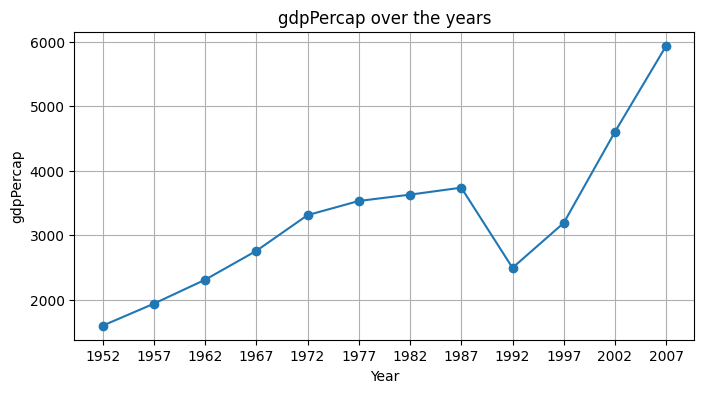

In [14]:
country = "Albania"
col = "gdpPercap"

df_country = df[df["country"] == country]

df_country.plot(
    kind="line",
    marker = "o",
    x = "year",
    y = col,
    figsize = (8, 4),
    title = f"{col} over the years",
    xlabel = "Year",
    ylabel = col,
    xticks = df["year"].unique(),
    legend = False,
    grid = True,
)
plt.show()

## How has the population/life expectancy/gdp changed globally over time?
Assume equals weights for each country during mean computation.

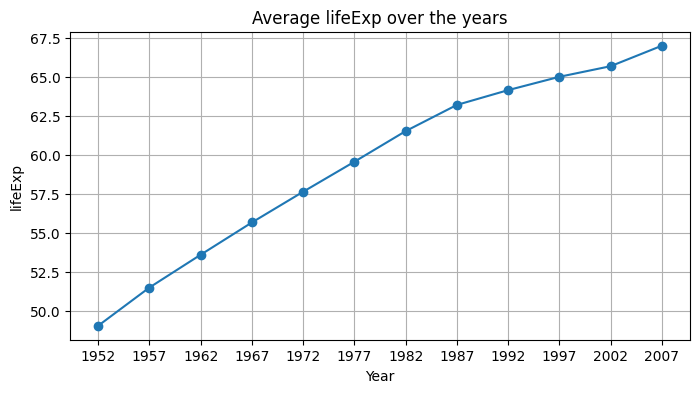

In [15]:
col = "lifeExp"

df.groupby("year")[[col]].mean().plot(
    kind = "line",
    marker = "o",
    figsize = (8, 4),
    title = f"Average {col} over the years",
    xlabel = "Year",
    ylabel = col,
    xticks = df["year"].unique(),
    grid = True,
    legend = False,
)
plt.show()

## Which continenet has the highest/lowest population/lifeExp/gdp?
- Aggerating countries: Sum or Average.
- Not ideal for actual analysis.

In [16]:
col = "gdpPercap"

print(df.groupby("continent")[col].mean().idxmin())
print()
print(df.groupby("continent")[col].mean().idxmax())

Africa

Oceania


# gdpPercap skew

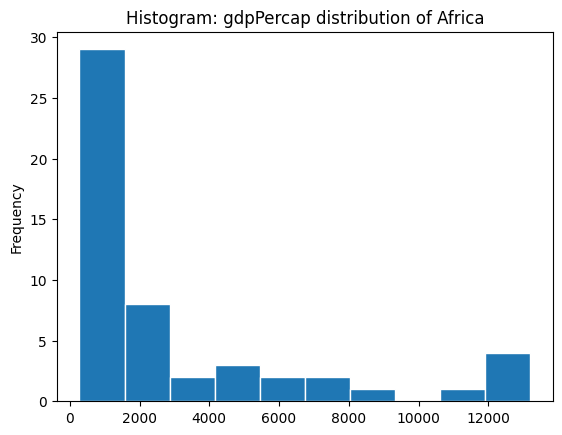


Skewness: 1.7073764132351172


In [17]:
continent = "Africa"
col = "gdpPercap"

df[(df["continent"] == continent) & (df["year"] == 2007)].plot(
    kind = "hist",
    bins = 10,
    title = f"Histogram: gdpPercap distribution of {continent}",
    y = col,
    ec = "white", # bin edge color
    grid = False,
    legend = False,
)
plt.show()

print()
# Use \ to break long lines of code into multiple lines.
print("Skewness:", df[(df["continent"] == continent) \
                      & (df["year"] == 2007)][col].skew())

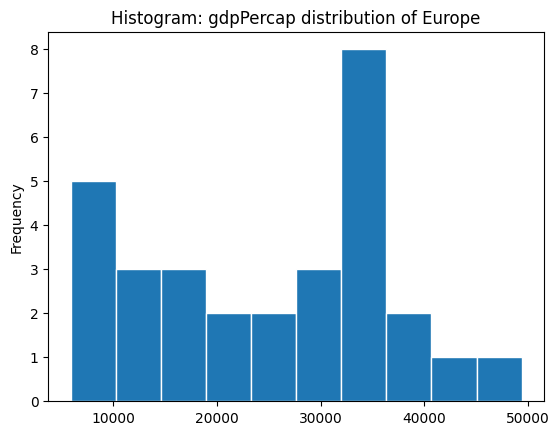


Skewness: -0.1028377401079659


In [18]:
continent = "Europe"
col = "gdpPercap"

df[(df["continent"] == continent) & (df["year"] == 2007)].plot(
    kind = "hist",
    bins = 10,
    title = f"Histogram: gdpPercap distribution of {continent}",
    y = col,
    ec = "white", # bin edge color
    grid = False,
    legend = False,
)
plt.show()

print()
# Use \ to break long lines of code into multiple lines.
print("Skewness:", df[(df["continent"] == continent) \
                      & (df["year"] == 2007)][col].skew())

# gdpPercap distribution

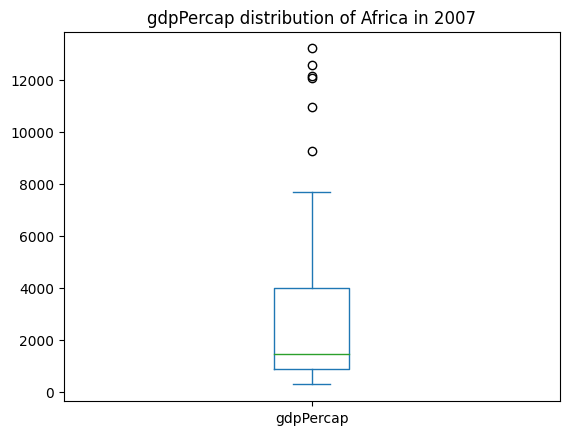

In [19]:
continent = "Africa"
col = "gdpPercap"
year = 2007

df[(df["continent"] == continent) & (df["year"] == year)].plot(
    kind = "box",
    y = col,
    title = f"{col} distribution of {continent} in {year}",
    grid = False,
    legend = False,
)
plt.show()

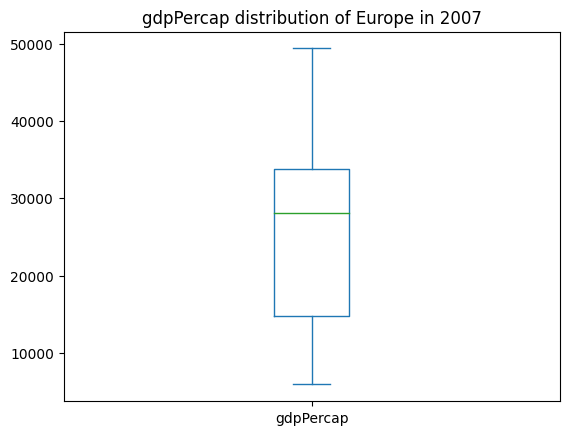

In [20]:
continent = "Europe"
col = "gdpPercap"
year = 2007

df[(df["continent"] == continent) & (df["year"] == year)].plot(
    kind = "box",
    y = col,
    title = f"{col} distribution of {continent} in {year}",
    grid = False,
    legend = False,
)
plt.show()

# Comparing gdpPercap distributions

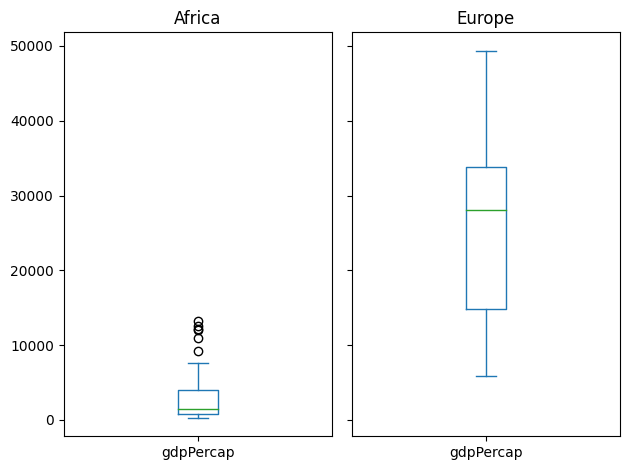

In [21]:
col = "gdpPercap"
c1 = "Africa"
c2 = "Europe"
year = 2007

# subplots() returns a figure and axes object.
# The axes is indexed to access individual subplots.
__, ax = plt.subplots(nrows=1, ncols=2, sharey=True) # Notice "sharey"

df[(df["continent"] == c1) & (df["year"] == year)].plot(
    kind="box", y=col, ax=ax[0], title="Africa")

df[(df["continent"] == c2) & (df["year"] == year)].plot(
    kind="box", y=col, ax=ax[1], title="Europe")

plt.tight_layout() # Adds necessay padding between subplots.
plt.show()